In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

/home/kostya/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,9,10,11,12,43,157,196,214,225,228,229,231,235,238) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/kostya/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,9,10,11,12,43,157,167,177,196,214,225,228,229,231,235,238) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
train.shape, test.shape

((145231, 1934), (145232, 1933))

# 1. Data cleaning
<br>
<br>
<br>

In [4]:
[col for col in train.columns if train[col].isna().sum() == len(train)]

['VAR_0207', 'VAR_0213', 'VAR_0840']

In [5]:
train = train.dropna(axis = 1, how = 'all')

In [6]:
[col for col in train.columns if train[col].isna().sum() == len(train)]

[]

In [7]:
test.drop(['VAR_0207', 'VAR_0213', 'VAR_0840'], axis=1, inplace=True)

In [8]:
train.dtypes.value_counts(), test.dtypes.value_counts()

(int64      1406
 float64     474
 object       51
 dtype: int64,
 int64      1405
 float64     474
 object       51
 dtype: int64)

In [9]:
train.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


## a) Working with date/time
<br>
<br>
<br>

In [10]:
i = 0
dt = []
for col in train.columns:
    try:
        train[col] = pd.to_datetime(train[col], format ='%d%b%y:%H:%M:%S')
        dt.append(col)
    except:
        pass
    i += 1

In [11]:
i

1931

In [12]:
len(dt)

16

### Datetime columns

In [13]:
dt

['VAR_0073',
 'VAR_0075',
 'VAR_0156',
 'VAR_0157',
 'VAR_0158',
 'VAR_0159',
 'VAR_0166',
 'VAR_0167',
 'VAR_0168',
 'VAR_0169',
 'VAR_0176',
 'VAR_0177',
 'VAR_0178',
 'VAR_0179',
 'VAR_0204',
 'VAR_0217']

In [14]:
sum([pd.core.dtypes.common.is_datetime_or_timedelta_dtype(train[col]) for col in train.columns])

16

In [15]:
train.dtypes.value_counts()

int64             1406
float64            474
object              35
datetime64[ns]      16
dtype: int64

### Gathering some information on datetime columns

In [16]:
for col in train.columns:
    if pd.core.dtypes.common.is_datetime_or_timedelta_dtype(train[col]) == 1:
        print(col, '     nan:', train[col].isnull().sum(), '       min:', train[col].min(), '          max:', train[col].max())

VAR_0073      nan: 101127        min: 2008-01-02 00:00:00           max: 2012-10-31 00:00:00
VAR_0075      nan: 56        min: 2001-01-01 00:00:00           max: 2012-11-01 00:00:00
VAR_0156      nan: 139361        min: 2008-04-11 00:00:00           max: 2012-10-29 00:00:00
VAR_0157      nan: 144311        min: 2008-10-17 00:00:00           max: 2012-10-31 00:00:00
VAR_0158      nan: 143142        min: 2008-09-30 00:00:00           max: 2012-10-29 00:00:00
VAR_0159      nan: 139361        min: 2008-09-23 00:00:00           max: 2012-10-29 00:00:00
VAR_0166      nan: 131001        min: 2002-07-30 00:00:00           max: 2012-10-30 00:00:00
VAR_0167      nan: 142664        min: 2005-02-12 00:00:00           max: 2012-10-30 00:00:00
VAR_0168      nan: 134506        min: 1999-12-31 00:00:00           max: 2012-11-01 00:00:00
VAR_0169      nan: 131001        min: 2002-07-30 00:00:00           max: 2012-11-01 00:00:00
VAR_0176      nan: 127699        min: 2002-07-30 00:00:00           max: 2

### Removing columns with too many missing values

In [17]:
dt_missing = []
for col in dt:
    if train[col].isnull().sum() > 135000:
        dt_missing.append(col)

In [18]:
dt_missing

['VAR_0156', 'VAR_0157', 'VAR_0158', 'VAR_0159', 'VAR_0167', 'VAR_0177']

In [19]:
train.drop(dt_missing, axis=1, inplace=True)
test.drop(dt_missing, axis=1, inplace=True)

In [20]:
train.dtypes.value_counts(), test.dtypes.value_counts()

(int64             1406
 float64            474
 object              35
 datetime64[ns]      10
 dtype: int64,
 int64      1405
 float64     474
 object       45
 dtype: int64)

In [21]:
list(set(dt) - set(dt_missing))

['VAR_0179',
 'VAR_0073',
 'VAR_0075',
 'VAR_0217',
 'VAR_0168',
 'VAR_0166',
 'VAR_0176',
 'VAR_0204',
 'VAR_0169',
 'VAR_0178']

In [22]:
i = 0
for col in list(set(dt) - set(dt_missing)):
    try:
        test[col] = pd.to_datetime(test[col], format ='%d%b%y:%H:%M:%S')
    except:
        pass
    i += 1

In [23]:
i

10

In [24]:
train.dtypes.value_counts(), test.dtypes.value_counts()

(int64             1406
 float64            474
 object              35
 datetime64[ns]      10
 dtype: int64,
 int64             1405
 float64            474
 object              35
 datetime64[ns]      10
 dtype: int64)

In [25]:
sum([pd.core.dtypes.common.is_datetime_or_timedelta_dtype(test[col]) for col in test.columns])

10

In [26]:
sum([pd.core.dtypes.common.is_datetime_or_timedelta_dtype(train[col]) for col in train.columns])

10

### Datetime variables transformation (time part was mostly not present and when it was present there were too many missing values so i ignored it)

In [27]:
def dt_month_sin(df):
    return df.apply(lambda x: np.sin((2*np.pi*x.month)/12))
def dt_month_cos(df):
    return df.apply(lambda x: np.cos((2*np.pi*x.month)/12))

In [28]:
def dt_weekend(df):
    return df.apply(lambda x: 1 if x.weekday() >= 5 else (0 if x.weekday() >= 0 else np.nan))

In [29]:
for col in list(set(dt) - set(dt_missing)):
    train[col+'_month_sin'] = dt_month_sin(train[col])
    train[col+'_month_cos'] = dt_month_cos(train[col])
    train[col+'_weekend'] = dt_weekend(train[col])

In [30]:
for col in list(set(dt) - set(dt_missing)):
    test[col+'_month_sin'] = dt_month_sin(test[col])
    test[col+'_month_cos'] = dt_month_cos(test[col])
    test[col+'_weekend'] = dt_weekend(test[col])

In [31]:
train.dtypes.value_counts(), test.dtypes.value_counts()

(int64             1406
 float64            504
 object              35
 datetime64[ns]      10
 dtype: int64,
 int64             1405
 float64            504
 object              35
 datetime64[ns]      10
 dtype: int64)

### Dropping original datetime variables

In [32]:
train.drop(list(set(dt) - set(dt_missing)), axis=1, inplace=True)
test.drop(list(set(dt) - set(dt_missing)), axis=1, inplace=True)

In [33]:
train.dtypes.value_counts(), test.dtypes.value_counts()

(int64      1406
 float64     504
 object       35
 dtype: int64,
 int64      1405
 float64     504
 object       35
 dtype: int64)

## b) Working with categorical variables
<br>
<br>
<br>

In [34]:
obj = []
for col in train.columns:
    if train[col].dtypes == 'object':
        obj.append(col)

In [35]:
len(obj)

35

### Turning missing values into a separate category

In [36]:
for col in obj:
    train[col] = train[col].fillna(value='missing')

In [37]:
for col in obj:
    test[col] = test[col].fillna(value='missing')

In [38]:
sum(train[obj].isna().any())

0

In [39]:
sum(test[obj].isna().any())

0

In [40]:
for col in train.columns:
    if train[col].dtypes == 'object':
        print(col, len(train[col].unique()), train[col].value_counts().min(), train[col].value_counts().max())

VAR_0001 3 509 84893
VAR_0005 4 2878 71449
VAR_0008 2 56 145175
VAR_0009 2 56 145175
VAR_0010 2 56 145175
VAR_0011 2 56 145175
VAR_0012 2 56 145175
VAR_0043 2 56 145175
VAR_0044 2 56 145175
VAR_0196 2 56 145175
VAR_0200 12386 1 2091
VAR_0202 2 56 145175
VAR_0214 13 1 145219
VAR_0216 2 56 145175
VAR_0222 2 56 145175
VAR_0226 3 56 144703
VAR_0229 2 56 145175
VAR_0230 3 56 145004
VAR_0232 3 56 82118
VAR_0236 3 56 144849
VAR_0237 46 1 15770
VAR_0239 2 56 145175
VAR_0274 58 3 16258
VAR_0283 8 26 113607
VAR_0305 9 2 108830
VAR_0325 10 41 89842
VAR_0342 51 7 30969
VAR_0352 5 918 59807
VAR_0353 5 918 70031
VAR_0354 5 918 68242
VAR_0404 1824 1 130443
VAR_0466 3 918 121461
VAR_0467 5 106 121675
VAR_0493 609 1 135182
VAR_1934 5 2817 68484


### Removing variables with too many missing values

In [41]:
static_val = []
for col in obj:
    if train[col].value_counts().max() > 144500:
        static_val.append(col)

In [42]:
static_val

['VAR_0008',
 'VAR_0009',
 'VAR_0010',
 'VAR_0011',
 'VAR_0012',
 'VAR_0043',
 'VAR_0044',
 'VAR_0196',
 'VAR_0202',
 'VAR_0214',
 'VAR_0216',
 'VAR_0222',
 'VAR_0226',
 'VAR_0229',
 'VAR_0230',
 'VAR_0236',
 'VAR_0239']

In [43]:
train.drop(static_val, axis=1, inplace=True)
test.drop(static_val, axis=1, inplace=True)

In [44]:
train.dtypes.value_counts(), test.dtypes.value_counts()

(int64      1406
 float64     504
 object       18
 dtype: int64,
 int64      1405
 float64     504
 object       18
 dtype: int64)

In [45]:
obj = []
for col in train.columns:
    if train[col].dtypes == 'object':
        obj.append(col)

In [46]:
pd.options.display.max_columns = 40
#pd.reset_option('display.max_colwidth')
train[obj].head()

,VAR_0001,VAR_0005,VAR_0200,VAR_0232,VAR_0237,VAR_0274,VAR_0283,VAR_0305,VAR_0325,VAR_0342,VAR_0352,VAR_0353,VAR_0354,VAR_0404,VAR_0466,VAR_0467,VAR_0493,VAR_1934
0,H,C,FT LAUDERDALE,True,FL,FL,S,S,-1,CF,O,U,O,CHIEF EXECUTIVE OFFICER,-1,-1,COMMUNITY ASSOCIATION MANAGER,IAPS
1,H,B,SANTEE,False,CA,MI,S,S,H,EC,O,R,R,-1,I,Discharged,-1,IAPS
2,H,C,REEDSVILLE,True,WV,WV,S,P,R,UU,R,R,-1,-1,-1,-1,-1,IAPS
3,H,C,LIBERTY,False,TX,TX,S,P,H,-1,R,R,-1,-1,-1,-1,-1,RCC
4,R,N,FRANKFORT,True,IL,IL,S,P,S,-1,R,U,O,-1,-1,-1,-1,BRANCH


### Doing more research on categorical variables

In [47]:
for col in obj:
    print(col, len(train[col].unique()), train[col].value_counts().max())

VAR_0001 3 84893
VAR_0005 4 71449
VAR_0200 12386 2091
VAR_0232 3 82118
VAR_0237 46 15770
VAR_0274 58 16258
VAR_0283 8 113607
VAR_0305 9 108830
VAR_0325 10 89842
VAR_0342 51 30969
VAR_0352 5 59807
VAR_0353 5 70031
VAR_0354 5 68242
VAR_0404 1824 130443
VAR_0466 3 121461
VAR_0467 5 121675
VAR_0493 609 135182
VAR_1934 5 68484


In [48]:
train.VAR_0404.value_counts().head(20)

-1                         130443
CONTACT                      2163
PRESIDENT                    1315
AGENT                        1072
missing                       918
DIRECTOR                      864
OWNER                         770
MEMBER                        566
SECRETARY                     512
INDIVIDUAL - SOLE OWNER       458
MANAGER                       361
INCORPORATOR                  288
VICE PRESIDENT                267
CONTA                         254
TREASURER                     225
BOARD MEMBER                  167
MEMBER MANAGER                164
CEO                           143
OFFICE MANAGER                106
REGISTRANT                    105
Name: VAR_0404, dtype: int64

In [49]:
train[train.VAR_0404 == '-1'].target.sum()/train[train.VAR_0404 == '-1'].target.count(), \
train[train.VAR_0404 != '-1'].target.sum()/train[train.VAR_0404 != '-1'].target.count()

(0.23411758392554602, 0.21869083040302947)

/home/kostya/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/kostya/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


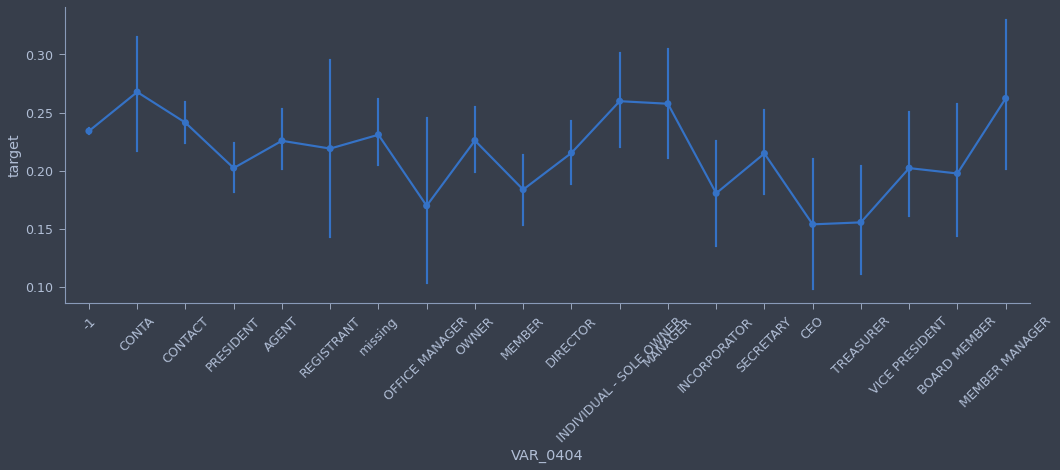

In [50]:
sns.factorplot('VAR_0404', 
               'target', 
               data=train[train.VAR_0404.isin(list(train.VAR_0404.value_counts().head(20).index))], 
               height=5, 
               aspect=3).set_xticklabels(rotation=45)

In [51]:
train.VAR_0493.value_counts().head(20)

-1                                      135182
REGISTERED NURSE                          1099
missing                                    918
LICENSED PRACTICAL NURSE                   767
PHARMACY TECHNICIAN                        536
COSMETOLOGIST                              452
GUARD                                      399
PERMANENT EMPLOYEE REGISTRATION CARD       325
PROFESSIONAL NURSE                         246
LICENSED VOCATIONAL NURSE                  243
NURSE AIDE                                 238
CERTIFIED NURSING ASSISTANT                238
REAL ESTATE                                226
PRACTICAL NURSE                            141
CERTIFIED NURSE AIDE                       111
INSURANCE AGENTS                            98
LICENSED REAL ESTATE SALESPERSON            89
REGISTERED PROFESSIONAL NURSE               86
FIREARM PERMIT                              85
MASTER COSMETOLOGIST                        79
Name: VAR_0493, dtype: int64

In [52]:
train[train.VAR_0493 == '-1'].target.sum()/train[train.VAR_0493 == '-1'].target.count(), \
train[train.VAR_0493 != '-1'].target.sum()/train[train.VAR_0493 != '-1'].target.count()

(0.23278986847361335, 0.22927654492984376)

/home/kostya/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/kostya/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


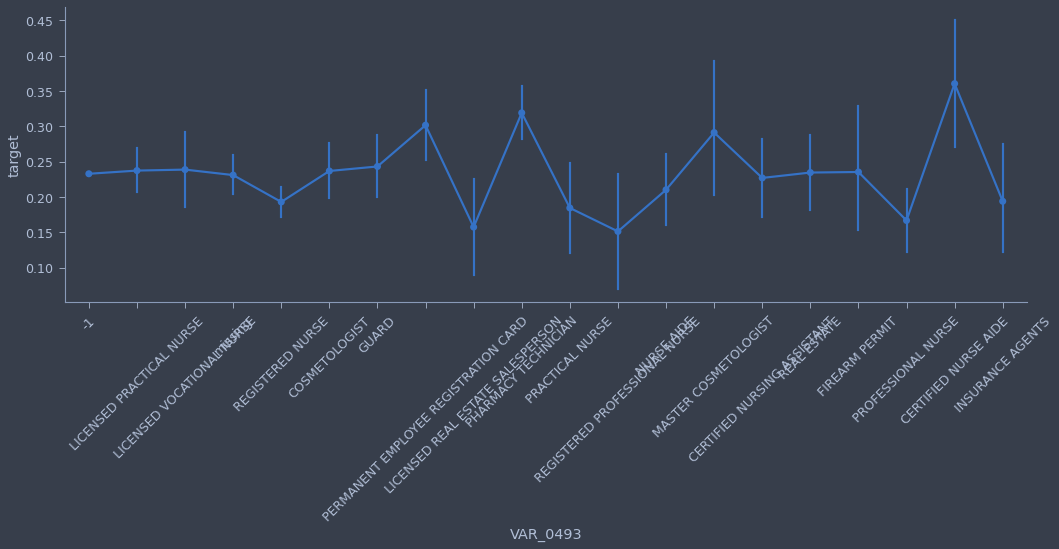

In [53]:
sns.factorplot('VAR_0493', 
               'target', 
               data=train[train.VAR_0493.isin(list(train.VAR_0493.value_counts().head(20).index))], 
               height=5, 
               aspect=3).set_xticklabels(rotation=45)

In [54]:
train.VAR_0237.value_counts()

CA         15770
TX         14186
NC         11691
GA          8730
IL          8479
VA          8081
OH          7307
FL          7004
PA          6937
SC          6083
IN          5506
TN          5226
AL          4985
WA          3722
KY          3404
LA          3284
MO          3257
CO          2808
MS          2386
OK          2338
WI          2234
OR          1523
WV          1459
NY          1372
NM          1322
AZ          1099
MI          1027
ID           695
MD           592
KS           548
NJ           536
UT           293
HI           264
IA           241
DE           161
NE           151
NV           146
WY           109
MT           105
SD            66
missing       56
DC            28
AR             9
MN             9
CT             1
AK             1
Name: VAR_0237, dtype: int64

/home/kostya/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/kostya/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


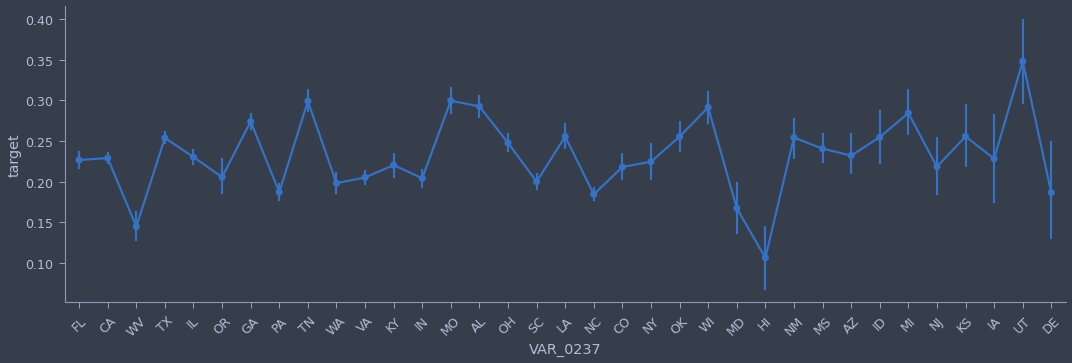

In [55]:
sns.factorplot('VAR_0237', 
               'target', 
               data=train[train.VAR_0237.isin(list(train.VAR_0237.value_counts().head(35).index))], 
               height=5, 
               aspect=3).set_xticklabels(rotation=45)

### Dropping variables with too many levels

In [51]:
too_many_levels = ['VAR_0200', 'VAR_0274', 'VAR_0342', 'VAR_0404', 'VAR_0493']

In [52]:
train.drop(too_many_levels, axis=1, inplace=True)
test.drop(too_many_levels, axis=1, inplace=True)

In [53]:
train.dtypes.value_counts(), test.dtypes.value_counts()

(int64      1406
 float64     504
 object       13
 dtype: int64,
 int64      1405
 float64     504
 object       13
 dtype: int64)

### Running one hot encoder on remaining categorical variables

In [54]:
obj = []
for col in train.columns:
    if train[col].dtypes == 'object':
        obj.append(col)

In [55]:
obj

['VAR_0001',
 'VAR_0005',
 'VAR_0232',
 'VAR_0237',
 'VAR_0283',
 'VAR_0305',
 'VAR_0325',
 'VAR_0352',
 'VAR_0353',
 'VAR_0354',
 'VAR_0466',
 'VAR_0467',
 'VAR_1934']

In [56]:
cols_added = []
for col in obj:
    ohe = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
    m_train = ohe.fit_transform(train[[col]].astype(str))
    m_train_d = pd.DataFrame(m_train, columns=[col + '_' + i for i in ohe.categories_])
    m_train_d.columns = [col[0].replace(" ", "_") for col in m_train_d.columns]
    
    m_test = ohe.transform(test[[col]].astype(str))
    m_test_d = pd.DataFrame(m_test, columns=[col + '_' + i for i in ohe.categories_])
    m_test_d.columns = [col[0].replace(" ", "_") for col in m_test_d.columns]
    
    train = pd.concat([train, m_train_d], axis=1)
    test = pd.concat([test, m_test_d], axis=1)
    cols_added.append(m_train_d.shape[1])

In [57]:
train.dtypes.value_counts(), test.dtypes.value_counts()

(int64      1406
 float64     615
 object       13
 dtype: int64,
 int64      1405
 float64     615
 object       13
 dtype: int64)

In [58]:
sum(cols_added)

111

In [59]:
train.drop(obj, axis=1, inplace=True)
test.drop(obj, axis=1, inplace=True)

In [60]:
train.dtypes.value_counts(), test.dtypes.value_counts()

(int64      1406
 float64     615
 dtype: int64,
 int64      1405
 float64     615
 dtype: int64)

## c) Working with numeric variables
<br>
<br>
<br>

In [61]:
train.nunique(axis=0, dropna=False).sort_values().head()

VAR_1428       1
VAR_0847       1
VAR_0237_WY    2
VAR_0005_N     2
VAR_0237_WV    2
dtype: int64

In [62]:
[col for col in train.columns if len(train[col].unique()) == 1]

['VAR_0847', 'VAR_1428']

In [63]:
train.drop([col for col in train.columns if len(train[col].unique()) == 1], axis=1, inplace=True)

In [64]:
test.drop(['VAR_0847', 'VAR_1428'], axis=1, inplace=True)

In [65]:
train.dtypes.value_counts(), test.dtypes.value_counts()

(int64      1404
 float64     615
 dtype: int64,
 int64      1403
 float64     615
 dtype: int64)

### Summarizing info on all variables into a dataset

In [66]:
many_outliers = pd.DataFrame()
for col in train.columns:
    q_low = train[col].quantile(0.01)
    q_hi  = train[col].quantile(0.99)
    many_outliers = many_outliers.append(pd.DataFrame({'name': [col], 
                                                       'outliers': [len(train[col][(train[col] < q_low) | (train[col] > q_hi)])],
                                                       'unique': [len(train[col].unique())],
                                                       'missing': [train[col].isna().sum()],
                                                       'majority': [train[col].value_counts().max()]
                                                      }))
many_outliers.reset_index(drop=True, inplace=True)

In [67]:
many_outliers.head()

,name,outliers,unique,missing,majority
0,ID,2906,145231,0,1
1,VAR_0002,713,820,0,5264
2,VAR_0003,1453,588,0,17436
3,VAR_0004,1451,7935,0,3195
4,VAR_0006,1381,38,56,98966


In [76]:
many_outliers.sort_values('outliers').tail(20)

,name,outliers,unique,missing,majority
1054,VAR_1110,2827,222,0,4488
231,VAR_0273,2842,730,918,1464
804,VAR_0860,2857,635,0,981
200,VAR_0242,2857,669,918,1302
230,VAR_0272,2860,758,918,1483
1089,VAR_1145,2869,647,0,931
866,VAR_0922,2874,651,0,923
294,VAR_0340,2888,22536,918,112964
1038,VAR_1094,2895,5210,0,2159
1039,VAR_1095,2896,5209,0,2166


In [77]:
many_outliers.sort_values('unique').tail(20)

,name,outliers,unique,missing,majority
253,VAR_0297,1438,38863,918,81703
268,VAR_0313,1444,39592,918,63723
252,VAR_0296,1445,40599,918,78446
249,VAR_0293,1445,41176,918,61939
1432,VAR_1489,2048,44818,0,14906
1438,VAR_1495,2043,45298,0,7536
1437,VAR_1494,1708,50377,0,14906
487,VAR_0541,2905,64229,0,1290
1125,VAR_1181,2406,71090,0,1188
1123,VAR_1179,2404,75062,0,1295


In [78]:
many_outliers.sort_values('missing').tail(40)

,name,outliers,unique,missing,majority
311,VAR_0361,1716,192,918,8869
318,VAR_0368,1410,254,918,122305
319,VAR_0369,1425,3464,918,134450
310,VAR_0360,789,25,918,35991
321,VAR_0371,216,5,918,144097
309,VAR_0359,1088,16,918,49900
308,VAR_0358,536,13,918,74393
323,VAR_0373,55,6,918,142363
322,VAR_0372,856,5,918,143457
320,VAR_0370,1427,494,918,134450


<AxesSubplot:xlabel='name'>

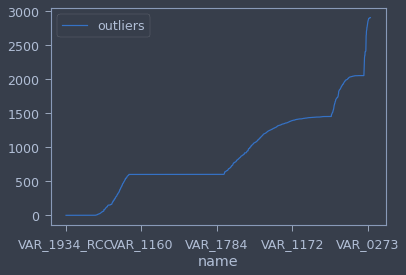

In [79]:
many_outliers.sort_values('outliers').plot(x='name', y='outliers')

<AxesSubplot:xlabel='name'>

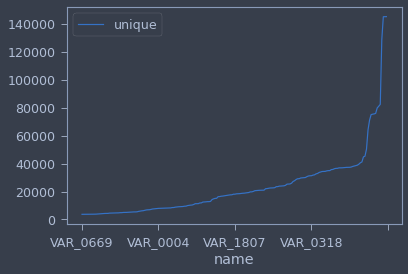

In [80]:
many_outliers.sort_values('unique').tail(200).plot(x='name', y='unique')

<AxesSubplot:xlabel='name'>

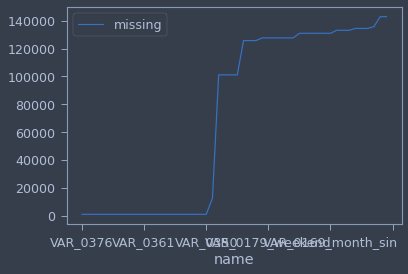

In [81]:
many_outliers.sort_values('missing').tail(50).plot(x='name', y='missing')

<AxesSubplot:xlabel='name'>

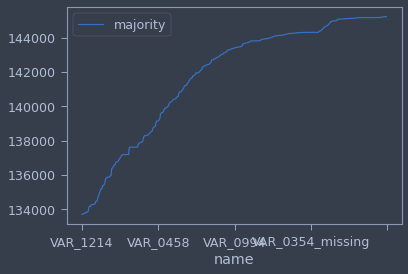

In [82]:
many_outliers.sort_values('majority').tail(400).plot(x='name', y='majority')

In [83]:
train.VAR_0227.value_counts().sort_index().tail(10)

3024173.0    1
3024181.0    1
3024206.0    1
3024217.0    1
3024218.0    1
3024221.0    1
3024232.0    1
3024233.0    1
3024241.0    1
3024265.0    1
Name: VAR_0227, dtype: int64

In [84]:
train.VAR_0227.value_counts().sort_values()

1761427.0    1
1489143.0    1
434300.0     1
2776793.0    1
2670695.0    1
            ..
1534932.0    1
140781.0     2
1536663.0    2
618812.0     2
2572617.0    2
Name: VAR_0227, Length: 145171, dtype: int64

<AxesSubplot:>

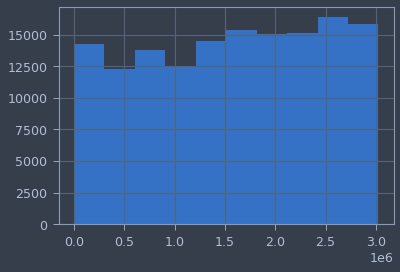

In [85]:
train.VAR_0227.hist()

<AxesSubplot:>

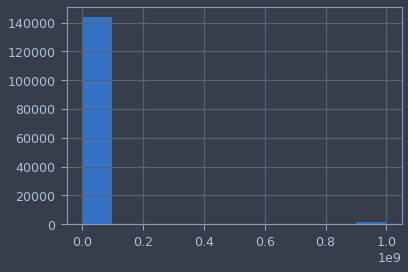

In [86]:
train.VAR_1095.hist()

### Removing most correlated columns from dataset, about 50% of columns is removed.

In [68]:
%%time
columns = [col for col in many_outliers.sort_values(['missing', 'unique'], ascending=(True, False)).name]
columns.remove('target')
columns.remove('ID')

for col1 in columns:
    for col2 in columns[columns.index(col1) + 1:]:
        if abs(train[col1].corr(train[col2])) > 0.9:
            columns.remove(col2)

CPU times: user 10min 58s, sys: 49.8 ms, total: 10min 58s
Wall time: 10min 59s


In [69]:
len(columns)

923

In [70]:
train[columns].shape, test[columns].shape

((145231, 923), (145232, 923))

In [71]:
y = train.target.copy()

# 2. Building a model
<br>
<br>
<br>

In [72]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [73]:
X_train, X_valid, y_train, y_valid = train_test_split(train[columns], y, random_state=3, stratify=y)

In [74]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((108923, 923), (36308, 923), (108923,), (36308,))

In [75]:
y_train.sum()/y_train.count(), y_valid.sum()/y_valid.count()

(0.23254959925819157, 0.23253828357386802)

### Checking which hyperparameters make most impact, one by one.

In [96]:
def param_plot(name, values):
    gb = xgb.XGBClassifier(objective='binary:logistic',
                       seed=3
    )

    params = {name: values}
    grid_gb = GridSearchCV(gb, 
                           params, 
                           scoring='roc_auc', 
                           n_jobs=4, 
                           verbose=1, 
                           cv=3, 
                           return_train_score=True
    )
    
    grid_gb.fit(X_train,
            y_train,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_valid, y_valid)],
            verbose=False
    )

    plt.plot(params[name], grid_gb.cv_results_['mean_test_score'], label='test score')
    plt.plot(params[name], grid_gb.cv_results_['mean_train_score'], label='train score')
    plt.legend()

Fitting 3 folds for each of 4 candidates, totalling 12 fits
CPU times: user 5min 51s, sys: 2.84 s, total: 5min 54s
Wall time: 3min 27s


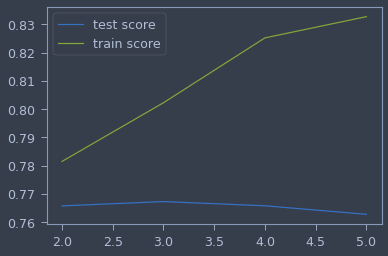

In [200]:
%%time
param_plot('max_depth', [2, 3, 4, 5])

Fitting 3 folds for each of 4 candidates, totalling 12 fits
CPU times: user 10min 22s, sys: 2.6 s, total: 10min 24s
Wall time: 5min 46s


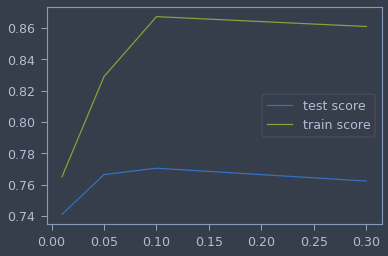

In [198]:
%%time
param_plot('learning_rate', [0.01, 0.05, 0.1, 0.3])

Fitting 3 folds for each of 4 candidates, totalling 12 fits
CPU times: user 6min 5s, sys: 2.27 s, total: 6min 8s
Wall time: 3min 11s


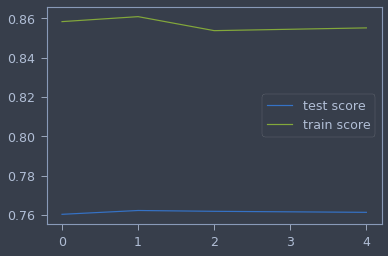

In [201]:
%%time
param_plot('min_child_weight', [0, 1, 2, 4])

Fitting 3 folds for each of 4 candidates, totalling 12 fits
CPU times: user 5min 56s, sys: 1.86 s, total: 5min 57s
Wall time: 2min 59s


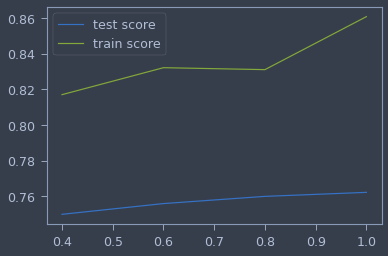

In [203]:
%%time
param_plot('subsample', [0.4, 0.6, 0.8, 1])

Fitting 3 folds for each of 4 candidates, totalling 12 fits
CPU times: user 5min 55s, sys: 2 s, total: 5min 57s
Wall time: 2min 36s


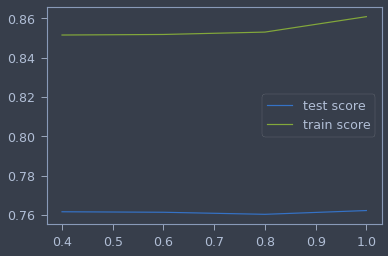

In [205]:
%%time
param_plot('colsample_bytree', [0.4, 0.6, 0.8, 1])

Fitting 3 folds for each of 4 candidates, totalling 12 fits
CPU times: user 5min 13s, sys: 1.84 s, total: 5min 14s
Wall time: 2min 52s


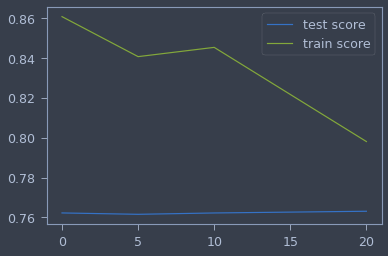

In [207]:
%%time
param_plot('gamma', [0, 5, 10, 20])

Fitting 3 folds for each of 5 candidates, totalling 15 fits
CPU times: user 5min 55s, sys: 2.07 s, total: 5min 57s
Wall time: 3min 57s


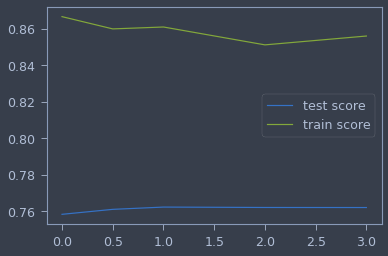

In [208]:
%%time
param_plot('lambda', [0, 0.5, 1, 2, 3])

Fitting 3 folds for each of 2 candidates, totalling 6 fits
CPU times: user 5min 53s, sys: 1.87 s, total: 5min 55s
Wall time: 1min 22s


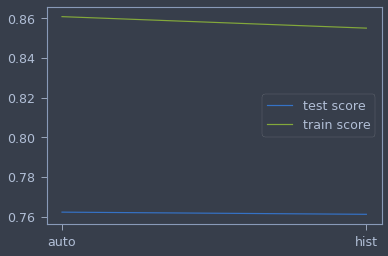

In [209]:
%%time
param_plot('tree_method', ['auto', 'hist'])

In [213]:
(y_train.count() - y_train.sum())/y_train.sum()

3.300157915515199

Fitting 3 folds for each of 2 candidates, totalling 6 fits
CPU times: user 5min 55s, sys: 1.94 s, total: 5min 57s
Wall time: 1min 54s


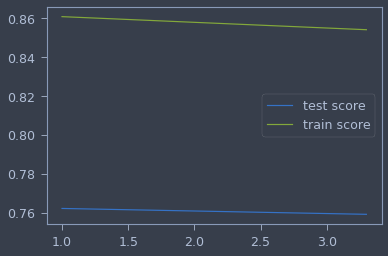

In [214]:
%%time
param_plot('scale_pos_weight', [1, 3.3])

Fitting 3 folds for each of 4 candidates, totalling 12 fits
CPU times: user 5min 16s, sys: 2.36 s, total: 5min 18s
Wall time: 3min 12s


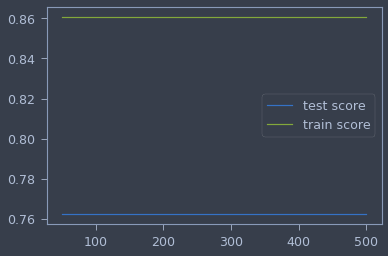

In [225]:
%%time
param_plot('n_estimators', [50, 100, 300, 500])

### Hyperparameter tuning and creating predictions to submit on kaggle

In [78]:
params = {
    'max_depth': [2, 3, 4],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1], 
    'colsample_bytree': [0.6, 1],
    'lambda': [1],
    'gamma': [0, 50],
    'tree_method': ['auto']
    }

In [79]:
%%time
gb = xgb.XGBClassifier(objective='binary:logistic',
                       seed=3
)

grid_gb = GridSearchCV(gb, 
                       params, 
                       scoring='roc_auc', 
                       n_jobs=1, 
                       verbose=1, 
                       cv=4, 
                       return_train_score=True
)

grid_gb.fit(X_train,
            y_train,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_valid, y_valid)],
            verbose=False
)


print(grid_gb.best_params_)


pd.DataFrame({'mean_test_score':grid_gb.cv_results_['mean_test_score'],
              'mean_train_score': grid_gb.cv_results_['mean_train_score']
             },
             index=grid_gb.cv_results_['params']).sort_values(by=['mean_test_score'], ascending=False).to_csv('Springleaf_scores_gb.csv')



final_gb = xgb.XGBClassifier(objective='binary:logistic',
                             seed=3,
                             **grid_gb.best_params_                             
)

final_gb.fit(train[columns], y)


pred = final_gb.predict(test[columns]).astype(int)
submission = pd.DataFrame({'ID': test.ID, 'target':pred})
submission.to_csv('Springleaf_submission_gb.csv', index=False)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
{'colsample_bytree': 1, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.2, 'max_depth': 4, 'subsample': 1, 'tree_method': 'auto'}
CPU times: user 17h 56min 49s, sys: 8min 56s, total: 18h 5min 46s
Wall time: 1h 21min 24s


In [80]:
print(grid_gb.best_params_)

{'colsample_bytree': 1, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.2, 'max_depth': 4, 'subsample': 1, 'tree_method': 'auto'}


In [81]:
grid_gb.best_score_

0.7709085184837855

In [82]:
pd.DataFrame({'mean_test_score':grid_gb.cv_results_['mean_test_score'],
              'mean_train_score': grid_gb.cv_results_['mean_train_score']
             },
             index=grid_gb.cv_results_['params']).sort_values(by=['mean_test_score'], ascending=False).head(10)

,mean_test_score,mean_train_score
"{'colsample_bytree': 1, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.2, 'max_depth': 4, 'subsample': 1, 'tree_method': 'auto'}",0.770909,0.816430
"{'colsample_bytree': 0.6, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.2, 'max_depth': 4, 'subsample': 1, 'tree_method': 'auto'}",0.769860,0.815118
"{'colsample_bytree': 0.6, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.2, 'max_depth': 4, 'subsample': 0.8, 'tree_method': 'auto'}",0.769265,0.814716
"{'colsample_bytree': 0.6, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.2, 'max_depth': 3, 'subsample': 1, 'tree_method': 'auto'}",0.769246,0.792018
"{'colsample_bytree': 0.6, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.2, 'max_depth': 3, 'subsample': 0.8, 'tree_method': 'auto'}",0.769172,0.792099
"{'colsample_bytree': 1, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.1, 'max_depth': 4, 'subsample': 0.8, 'tree_method': 'auto'}",0.768951,0.797342
"{'colsample_bytree': 0.6, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.1, 'max_depth': 4, 'subsample': 0.8, 'tree_method': 'auto'}",0.768679,0.795715
"{'colsample_bytree': 0.6, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.1, 'max_depth': 4, 'subsample': 1, 'tree_method': 'auto'}",0.768666,0.795981
"{'colsample_bytree': 1, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.2, 'max_depth': 3, 'subsample': 0.8, 'tree_method': 'auto'}",0.768504,0.793154
"{'colsample_bytree': 1, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.2, 'max_depth': 3, 'subsample': 1, 'tree_method': 'auto'}",0.768420,0.793574


### Confusion matrix

/home/kostya/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


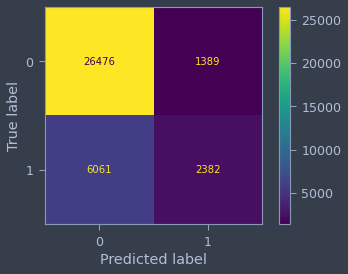

In [83]:
plot_gb = xgb.XGBClassifier(objective='binary:logistic',
                             seed=3,
                             **grid_gb.best_params_                             
)

plot_gb.fit(X_train,
             y_train,
             early_stopping_rounds=10,
             eval_metric='auc',
             eval_set=[(X_valid, y_valid)],
             verbose=False
)

plot_confusion_matrix(plot_gb,
                      X_valid,
                      y_valid
)

### Doing more kaggle submitions with other hyperparams combinations

In [89]:
params = {'colsample_bytree': 1, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.1, 'max_depth': 4, 'subsample': 0.8, 'tree_method': 'auto'}

alt_gb = xgb.XGBClassifier(objective='binary:logistic',
                             seed=3,
                             **params                             
)

alt_gb.fit(train[columns], y)


pred = alt_gb.predict(test[columns]).astype(int)
submission = pd.DataFrame({'ID': test.ID, 'target':pred})
submission.to_csv('Springleaf_submission_gb.csv', index=False)